<a href="https://colab.research.google.com/github/dkarakost/MBE_project/blob/main/TwoStepApproach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

if torch.__version__ != '2.5.1+cu124':
    !pip install torch==2.5.1+cu124 torchvision==0.20.1+cu124 torchaudio==2.5.1 --index-url https://download.pytorch.org/whl/cu124 -U --quiet
    print("PyTorch version updated to 2.5.1.")
else:
    print("PyTorch is already at the correct version (2.5.1).")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 103.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 96.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 98.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip install d2l==1.0.3 --quiet
!pip install scipy --quiet
!pip install torchmetrics --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.0/125.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.0/95.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the sour

`Now restart the runtime for the pytorch version change to take effect.`

<center><img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fi.stack.imgur.com%2FHGSSh.png&f=1&nofb=1&ipt=3138d8a64cabb6532ff6bd6bd61aede311aec0aaa97fddc911980eee8da014b8&ipo=images" width=800></center>

In [1]:
%matplotlib inline
from d2l import torch as d2l
import torch
import torchvision
from torchvision.transforms import ToPILImage
from torch import nn
from torch.nn import functional as F
from PIL import ImageFile, Image
import matplotlib.pyplot as plt
from object_detection_utils import ResizeWithBBox, plot_bbox, plot_grid, box_xyxy_to_cxcywh, box_xywh_to_xyxy
import random
import cv2

In [2]:
!git clone https://git.wur.nl/abe-datasets/education/fruit-detection-challenge.git

Cloning into 'fruit-detection-challenge'...
remote: Enumerating objects: 2010, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 2010 (delta 2), reused 0 (delta 0), pack-reused 2004 (from 1)
Receiving objects: 100% (2010/2010), 255.89 MiB | 11.93 MiB/s, done.
Resolving deltas: 100% (21/21), done.
Updating files: 100% (1958/1958), done.


In [3]:
import json

import torch
from PIL import Image
import numpy as np
import cv2

class FruitDetectionDataset(torch.utils.data.Dataset):
    def __init__(self, json_path, img_folder, img_size, transforms=None):
        """
        Constructor of the FruitDetectionDataset
        :param json_path: Path to the COCO JSON file
        :param img_folder: Folder containing the images
        :param img_size: Size to resize the images
        :param transforms: List of transformations to be applied to the data
        """
        self.img_folder = img_folder
        self.transforms = transforms
        self.resize = ResizeWithBBox(img_size)

        # Load the COCO JSON file
        with open(json_path, 'r') as f:
            coco_data = json.load(f)

        # Extract image info and annotations
        self.images = coco_data['images']
        self.annotations = coco_data['annotations']
        self.categories = coco_data['categories']

        # Create a mapping from category ID to category index
        self.category_id_to_index = {category['id']: idx for idx, category in enumerate(self.categories)}

        # Create a mapping from image ID to annotations
        self.img_id_to_annotations = {}
        for annotation in self.annotations:
            img_id = annotation['image_id']
            if img_id not in self.img_id_to_annotations:
                self.img_id_to_annotations[img_id] = []
            self.img_id_to_annotations[img_id].append(annotation)

        # Create a list of image paths
        self.img_files = [os.path.join(img_folder, img['file_name']) for img in self.images]

    def __getitem__(self, idx):
        # Get image path and annotations
        img_path = self.img_files[idx]
        img_id = self.images[idx]['id']
        annotations = self.img_id_to_annotations.get(img_id, [])

        # Load image
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = Image.fromarray(img)

        # Extract bounding boxes and labels
        bboxes = []
        labels = []
        for annotation in annotations:
            x, y, width, height = annotation['bbox']
            bboxes.append([x, y, width, height])
            category_id = annotation['category_id']
            labels.append(self.category_id_to_index[category_id])

        bboxes = torch.tensor(bboxes, dtype=torch.float32)
        labels = torch.tensor(labels, dtype=torch.int64)

        if len(bboxes.shape) == 1:
            bboxes = bboxes.unsqueeze(0)

        # Resize image and boxes
        img, bboxes = self.resize(image=img, boxes=bboxes)
        bboxes = box_xyxy_to_cxcywh(box_xywh_to_xyxy(torch.tensor(bboxes, dtype=torch.float32)))

        # Apply transforms
        if self.transforms:
            img = self.transforms(img)

        # Add illegal boxes if needed
        illegal_needed = 50 - len(bboxes)
        illegal_labels = torch.ones((illegal_needed,), dtype=torch.int64) * -1
        illegal_boxes = torch.zeros((illegal_needed, 4), dtype=torch.float32) * -1

        return img, {
            "labels": torch.cat((labels, illegal_labels)),
            "boxes": torch.cat((bboxes, illegal_boxes), axis=0),
        }

    def __len__(self):
        return len(self.img_files)


# The `Dataset` class
Now, let's create a dataset customized to our data.
We will call it `LeafDetectionDataset`.
* The constructor of the dataset (`__init__`) takes the root folder of the data, and finds the (sorted) path of all the images and bounding box annotations.
Lastly, it also has a `classes` variable. In our case, we only have one class: leaf.
* The `__get_item__` function gets the next image at index `idx` as well as the ground-truth bounding boxes.

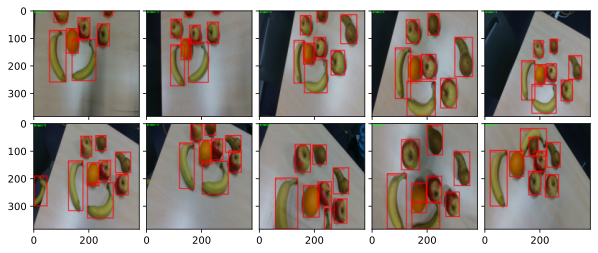

In [25]:
dataset_folder = 'leaf-dataset/detection'
import os
img_size = 384
batch_size = 16

augs = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

train_dataset = FruitDetectionDataset(
    "/content/fruit-detection-challenge/detection/annotations/train_one_class.json",
    "/content/fruit-detection-challenge/detection/train/",
    img_size=(img_size, img_size),
    transforms=augs,
)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)


val_dataset = FruitDetectionDataset(
    "/content/fruit-detection-challenge/detection/annotations/val_one_class.json",
    "/content/fruit-detection-challenge/detection/val/", # Corrected the image folder path
    img_size=(img_size, img_size),
    transforms=augs,
)

val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=1, shuffle=False, num_workers=1)

'''test_dataset = FruitDetectionDataset(
    #add here it is possible the test annotations,
    "/content/fruit-detection-challenge/detection/test/",
    img_size=(img_size, img_size),
    transforms=augs,
)'''

#test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=1)

display_imgs_bbox = []
for i in range(10):
    img, target = train_dataset[i]
    img = ToPILImage()(img)
    img = plot_bbox(img, target["boxes"] * img_size, target["labels"])
    display_imgs_bbox.append(img)

# Plot two grids, one per list (don't forget the functions declared in the beginning of this notebook)
plot_grid(imgs=display_imgs_bbox, nrows=2, ncols=5)

Model definition with a prediction head with :


*   Concolutional layers for feature extraciton
*   Box predictor
*   Classifier
*     objectness score



In [5]:
import torch
import torch.nn as nn
import torchvision.models as models

class PredictionHead(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(PredictionHead, self).__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv2d(in_channels, in_channels // 2, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(in_channels // 2),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Conv2d(in_channels // 2, in_channels // 4, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(in_channels // 4),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Conv2d(in_channels // 4, in_channels // 4, kernel_size=1),
            nn.BatchNorm2d(in_channels // 4),
            nn.LeakyReLU(negative_slope=0.1),
        )

        self.box_predictor = nn.Sequential(
            nn.Conv2d(in_channels=in_channels // 4, out_channels=in_channels // 4, kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.BatchNorm2d(in_channels // 4),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Conv2d(in_channels=in_channels // 4, out_channels=4, kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.Sigmoid(),
        )

        # Classifier
        self.classifier = nn.Sequential(
            nn.Conv2d(in_channels=in_channels // 4, out_channels=in_channels // 4, kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.BatchNorm2d(in_channels // 4),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Conv2d(in_channels=in_channels // 4, out_channels=num_classes, kernel_size=(3, 3), stride=(1, 1), padding=1),
        )

        # Objectness score predictor
        self.objectness_predictor = nn.Sequential(
            nn.Conv2d(in_channels=in_channels // 4, out_channels=in_channels // 4, kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.BatchNorm2d(in_channels // 4),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Conv2d(in_channels=in_channels // 4, out_channels=1, kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = self.conv_layers(x)
        cls_logits = self.classifier(x)
        bbox_pred = self.box_predictor(x)
        objectness_pred = self.objectness_predictor(x)

        # Add relative grid position to the cx and cy predictions of each box
        grid_size = x.shape[-1]
        grid_y, grid_x = torch.meshgrid(
            torch.arange(grid_size, device=x.device), torch.arange(grid_size, device=x.device), indexing="ij"
        )
        cx = bbox_pred[:, 0, :, :]
        cy = bbox_pred[:, 1, :, :]
        w = bbox_pred[:, 2, :, :]
        h = bbox_pred[:, 3, :, :]
        cx = (cx + (grid_x)) / grid_size
        cy = (cy + (grid_y)) / grid_size
        bbox_pred = torch.stack([cx, cy, w, h], dim=1)

        return cls_logits, bbox_pred, objectness_pred


# Main detection model using a ReNet18 backbone. Multiscale prediction heads

class ObjectDetectorMultiScale(nn.Module):
    def __init__(self, n_classes, pretrained=True):
        super(ObjectDetectorMultiScale, self).__init__()

        # We add the background class
        self.n_classes = n_classes

        # Backbone
        backbone = models.resnet18(pretrained=pretrained)
        self.backbone = nn.Sequential(*list(backbone.children())[:-3])

        # Layer 1
        self.block_1 = nn.Sequential(*list(backbone.children())[-3])

        self.prediction_head = PredictionHead(512, self.n_classes)
        self.prediction_head_2 = PredictionHead(256, self.n_classes)

    def forward(self, x):
        features = self.backbone(x)
        y_ = self.block_1(features)

        cls_logits, bbox_pred, objectness_pred = self.prediction_head(y_)
        cls_preds = cls_logits.flatten(2, 3).permute(0, 2, 1)
        box_preds = bbox_pred.flatten(2, 3).permute(0, 2, 1)
        obj_preds = objectness_pred.flatten(2, 3).permute(0, 2, 1)

        cls_logits2, bbox_pred2, objectness_pred2 = self.prediction_head_2(features)
        cls_preds2 = cls_logits2.flatten(2, 3).permute(0, 2, 1)
        box_preds2 = bbox_pred2.flatten(2, 3).permute(0, 2, 1)
        obj_preds2 = objectness_pred2.flatten(2, 3).permute(0, 2, 1)

        # Concatenate predictions from all heads
        pred_logits = torch.cat([cls_preds, cls_preds2], dim=1)
        pred_boxes = torch.cat([box_preds, box_preds2], dim=1)
        pred_objectness = torch.cat([obj_preds, obj_preds2], dim=1)

        return {"pred_logits": pred_logits, "pred_boxes": pred_boxes, "pred_objectness": pred_objectness}

Training Setup: \
Hungarian matcher for matching predictions to ground truth

Multi-task loss (classification, bounding box regression, objectness)

Learning rate scheduling

Validation AP calculation

124.5 examples/sec on cuda:0


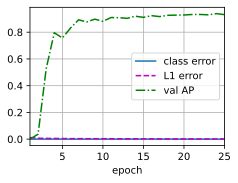

In [8]:
from object_detection_utils import *

def train_model(model, train_loader, val_loader, num_epochs=25, lr=1e-3, weight_decay=1e-4, step_size=20, gamma=0.1):
    device = d2l.try_gpu()
    model = model.to(device)
    matcher = HungarianMatcher()
    optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=gamma)
    print("total num of parameters in the model:", sum(p.numel() for p in model.parameters()))

    timer = d2l.Timer()
    animator = d2l.Animator(xlabel="epoch", xlim=[1, num_epochs], legend=["class error", "L1 error", "val AP"])

    ap_calculator = APCalculator(val_loader)

    for epoch in range(num_epochs):
        metric = d2l.Accumulator(4)
        model.train()
        for img, targets in train_loader:
            timer.start()

            img = img.to(device)

            # Remove illegal targets
            new_targets = []
            for i in range(targets["labels"].shape[0]):
                labels = targets["labels"][i]
                boxes = targets["boxes"][i]
                new_targets.append({"labels": labels[labels != -1].to(device), "boxes": boxes[labels != -1].to(device)})

            outputs = model(img)

            num_boxes = sum(len(t["labels"]) for t in new_targets)
            num_boxes = torch.as_tensor([num_boxes], dtype=torch.float, device=next(iter(outputs.values())).device)

            src_logits = outputs["pred_logits"]
            src_boxes = outputs["pred_boxes"]
            src_objectness = outputs["pred_objectness"]

            indices = matcher(outputs, new_targets)  # Run matcher
            idx = get_src_permutation_idx(indices)

            # Loss class
            target_classes_o = torch.cat([t["labels"][J] for t, (_, J) in zip(new_targets, indices)])
            target_classes = torch.full(src_logits.shape[:2], -100, dtype=torch.int64, device=device)
            target_classes[idx] = target_classes_o
            loss_ce = F.cross_entropy(src_logits.transpose(1, 2), target_classes, ignore_index=-100)

            # Loss boxes L1 and GIOU
            src_boxes = src_boxes[idx]
            target_boxes = torch.cat([t["boxes"][i] for t, (_, i) in zip(new_targets, indices)], dim=0)

            loss_bbox = F.l1_loss(src_boxes, target_boxes, reduction="none")
            loss_bbox = loss_bbox.sum() / num_boxes

            # Loss objectness
            target_objectness = torch.zeros_like(src_objectness, device=device)
            target_objectness[idx] = 1
            loss_objectness = F.mse_loss(src_objectness, target_objectness, reduction="mean")

            # Sum the losses
            loss = loss_ce + loss_bbox + loss_objectness

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            metric.add(
                loss_ce.cpu().detach().numpy(),
                loss_bbox.cpu().detach().numpy(),
                loss_objectness.cpu().detach().numpy(),
                img.size()[0],
            )
        scheduler.step()
        cls_err, L1_error, obj_error = metric[0] / metric[3], metric[1] / metric[3], metric[2] / metric[3]
        ap = ap_calculator.calculate_map(model, nms_threshold=0.5)
        print(ap)
        animator.add(epoch + 1, (cls_err, L1_error, ap["map_50"]))
    print(f"{len(train_loader.dataset) / timer.stop():.1f} examples/sec on " f"{str(device)}")

# train_model(model, train_loader, val_loader)
model = ObjectDetectorMultiScale(n_classes=len(train_dataset.categories))
train_model(model, train_loader, val_loader, num_epochs=25, lr=1e-3, weight_decay=1e-4, step_size=15, gamma=0.1)

Show some predictions

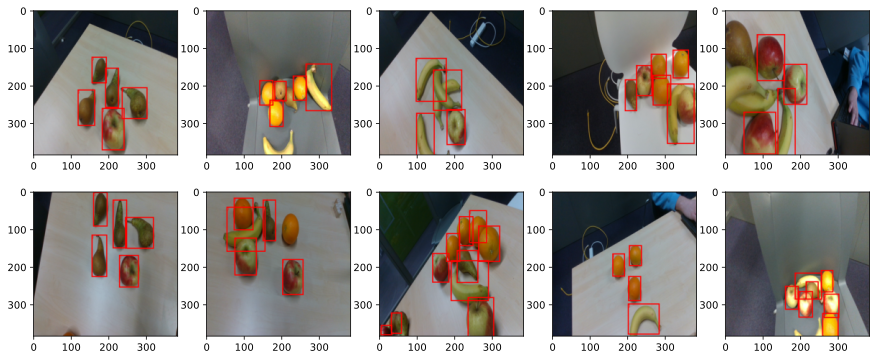

In [10]:
# Visualize some predictions
nrows, ncols = 2, 5
plt.figure(figsize=(15, 6))
for i in range(nrows * ncols):
    # Get a random image
    img, _ = train_dataset[random.randint(0, len(train_dataset) - 1)]
    # Get the predicted bboxes
    boxes, scores, top_class = predict(model, img, n_classes=4, nms_threshold=0.5, conf_threshold=0.5)
    # Plot it
    plot_img = plot_bbox(ToPILImage()(img), boxes, top_class.numpy())
    plt.subplot(nrows, ncols, i + 1)
    plt.imshow(plot_img)
plt.show()

Evaluation of the Model

In [12]:
ap_calculator = APCalculator(val_loader)
ap = ap_calculator.calculate_map(model, nms_threshold=0.5)

print(f"AP: {ap['map'].item():.4f}")
print(f"AP@50: {ap['map_50'].item():.4f}")
print(f"AP@75: {ap['map_75'].item():.4f}")
print(f"AP (small): {ap['map_small'].item():.4f}")
print(f"AP (medium): {ap['map_medium'].item():.4f}")
print(f"AP (large): {ap['map_large'].item():.4f}")
print(f"AR@1: {ap['mar_1'].item():.4f}")
print(f"AR@10: {ap['mar_10'].item():.4f}")
print(f"AR@100: {ap['mar_100'].item():.4f}")
print(f"AR (small): {ap['mar_small'].item():.4f}")
print(f"AR (medium): {ap['mar_medium'].item():.4f}")
print(f"AR (large): {ap['mar_large'].item():.4f}")
print(f"AP per class: {ap['map_per_class']}")
print(f"AR@100 per class: {ap['mar_100_per_class']}")
print(f"Classes: {ap['classes']}")

AP: 0.5346
AP@50: 0.9313
AP@75: 0.5320
AP (small): 0.5346
AP (medium): -1.0000
AP (large): -1.0000
AR@1: 0.0986
AR@10: 0.5944
AR@100: 0.5972
AR (small): 0.5972
AR (medium): -1.0000
AR (large): -1.0000
AP per class: 0.5346251726150513
AR@100 per class: 0.5972222089767456
Classes: 0


Classification Model Setup




In [14]:
data_dir = "/content/fruit-detection-challenge/classification"

train_imgs = torchvision.datasets.ImageFolder(
    os.path.join(data_dir, 'train'))
val_imgs = torchvision.datasets.ImageFolder(
    os.path.join(data_dir, 'val'))

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

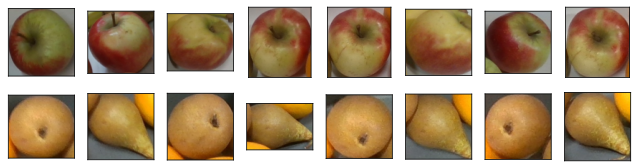

In [15]:
hotdogs = [train_imgs[i][0] for i in range(8)]
not_hotdogs = [train_imgs[-i - 1][0] for i in range(8)]
d2l.show_images(hotdogs + not_hotdogs, 2, 8, scale=1.4)

In [16]:
train_imgs.classes, train_imgs.class_to_idx

(['apple', 'banana', 'orange', 'pear'],
 {'apple': 0, 'banana': 1, 'orange': 2, 'pear': 3})

Classification model setup

In [17]:
# We specify the mean and variance of the three RGB channels to normalize the
# image channel
normalize = torchvision.transforms.Normalize(
    [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

train_augs = torchvision.transforms.Compose([
    torchvision.transforms.RandomResizedCrop(224),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.ToTensor(),
    normalize])

val_augs = torchvision.transforms.Compose([
    torchvision.transforms.Resize(256),
    torchvision.transforms.CenterCrop(224),
    torchvision.transforms.ToTensor(),
    normalize])

In [18]:
finetune_net = torchvision.models.resnet18(pretrained=True)
finetune_net.fc = nn.Linear(finetune_net.fc.in_features, 4)
nn.init.xavier_uniform_(finetune_net.fc.weight)

Parameter containing:
tensor([[ 0.0143, -0.0040, -0.0478,  ..., -0.0268,  0.0523,  0.1019],
        [ 0.0551, -0.0671, -0.0727,  ..., -0.0611, -0.0764, -0.0749],
        [ 0.0147,  0.0150, -0.0158,  ...,  0.0062,  0.0918,  0.0747],
        [ 0.0412,  0.0205, -0.0106,  ..., -0.0036, -0.0133, -0.0698]],
       requires_grad=True)

Testing accuracy

In [19]:
def train_fine_tuning(net, learning_rate, batch_size=128, num_epochs=5,
                      param_group=True):
    train_iter = torch.utils.data.DataLoader(torchvision.datasets.ImageFolder(
        os.path.join(data_dir, 'train'), transform=train_augs),
        batch_size=batch_size, shuffle=True)
    val_iter = torch.utils.data.DataLoader(torchvision.datasets.ImageFolder(
        os.path.join(data_dir, 'val'), transform=val_augs),
        batch_size=batch_size)
    devices = d2l.try_all_gpus()
    loss = nn.CrossEntropyLoss(reduction="none")
    if param_group:
        params_1x = [param for name, param in net.named_parameters()
             if name not in ["fc.weight", "fc.bias"]]
        trainer = torch.optim.SGD([{'params': params_1x},
                                   {'params': net.fc.parameters(),
                                    'lr': learning_rate * 10}],
                                lr=learning_rate, weight_decay=0.001)
    else:
        trainer = torch.optim.SGD(net.parameters(), lr=learning_rate,
                                  weight_decay=0.001)
    d2l.train_ch13(net, train_iter, val_iter, loss, trainer, num_epochs,
                   devices)

classification model training

loss 0.157, train acc 0.952, test acc 0.972
358.9 examples/sec on [device(type='cuda', index=0)]


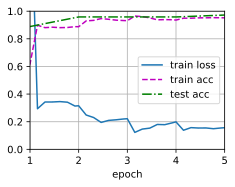

In [20]:
train_fine_tuning(finetune_net, 5e-5)

2 stage prediction pipeline

In [111]:
from torch.utils.data import Dataset
from PIL import Image
import os

class TestImageDataset(Dataset):
    def __init__(self, img_dir, transform=None):
        self.img_dir = img_dir
        self.img_files = sorted([os.path.join(img_dir, f)
                                 for f in os.listdir(img_dir) if f.lower().endswith(('jpg', 'jpeg', 'png'))])
        self.transform = transform
        self.images = [{"id": i} for i in range(len(self.img_files))]  # dummy ids

    def __len__(self):
        return len(self.img_files)

    def __getitem__(self, idx):
        img_path = self.img_files[idx]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, 0  # dummy label


In [114]:
def predict_test_set_two_stages(model, test_dataset, output_txt_path, classifier_model, score_threshold=0.3, nms_threshold=0.3):
    """
    Predict bounding boxes for all images in the test dataset and use finetune_net to classify the boxes.
    Saves results to a text file: file_name, cx, cy, w, h, label, score
    """
    model.eval()
    classifier_model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    classifier_model.to(device)

    # For processing classifier inputs
    val_transform = torchvision.transforms.Compose([
        torchvision.transforms.Resize(256),
        torchvision.transforms.CenterCrop(224),
        torchvision.transforms.ToTensor(),
        normalize
    ])

    with open(output_txt_path, "w") as out_file:
        for i in range(len(test_dataset)):
            # Load data
            img, _ = test_dataset[i]
            img_path = test_dataset.img_files[i]
            img_id = test_dataset.images[i]["id"]
            # Load original image without transforms
            pil_img = Image.open(img_path).convert("RGB")
            pil_img = pil_img.resize((img_size, img_size))

            # Detect boxes
            boxes, scores, _ = predict(model, img,
                                     n_classes=1, nms_threshold=nms_threshold, conf_threshold=score_threshold)
            print(img_path, boxes, scores)
            if len(boxes) > 0:
                # Convert boxes to original image coordinates
                boxes_orig = boxes.clone() / img_size  # Normalize to 0-1 range

                # Extract each detected object and classify it
                file_name = os.path.basename(img_path)
                for j, (box, sc) in enumerate(zip(boxes, scores)):
                    # Convert box from [cx, cy, w, h] format to [x1, y1, x2, y2]
                    cx, cy, w, h = box.tolist()
                    x1 = max(0, int((cx - w/2)))
                    y1 = max(0, int((cy - h/2)))
                    x2 = min(img_size, int((cx + w/2)))
                    y2 = min(img_size, int((cy + h/2)))

                    # Crop the region from the image
                    crop = pil_img.crop((x1, y1, x2, y2))

                    # Preprocess crop for classification
                    crop_tensor = val_transform(crop).unsqueeze(0).to(device)

                    # Get classification
                    with torch.no_grad():
                        class_output = classifier_model(crop_tensor)
                        class_id = torch.argmax(class_output, dim=1).item()
                    print(class_id)
                    # Write to file
                    box_norm = boxes_orig[j]
                    cx, cy, w, h = box_norm.tolist()
                    out_file.write(f"{file_name}, {cx}, {cy}, {w}, {h}, {class_id + 1}, {sc}\n")
            else:
                # No detections for this image
                file_name = os.path.basename(img_path)
                # out_file.write(f"{file_name}, 0, 0, 0, 0, 0, 0\n")  # Write empty detection

    print(f"Two-stage predictions saved to {output_txt_path}")



In [115]:
img_size = 384  # or whatever your detection model expects

test_transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((img_size, img_size)),
    torchvision.transforms.ToTensor(),
])

test_dataset = TestImageDataset("/content/fruit-detection-challenge/test", transform=test_transform)

predict_test_set_two_stages(model, test_dataset, "predictions_two_stage.txt", finetune_net,
                             score_threshold=0.5, nms_threshold=0.5)

/content/fruit-detection-challenge/test/color_001.png tensor([[ 75.8604,  46.1709,  69.0730,  79.5321],
        [336.7073,  55.0578,  85.1209, 116.1253],
        [243.4717, 112.6934, 116.1644, 115.9405],
        [ 74.5367, 141.2693,  57.2124, 128.7990],
        [147.8410, 203.8891,  57.5820,  85.4472]], grad_fn=<MulBackward0>) tensor([1., 1., 1., 1., 1.], grad_fn=<IndexBackward0>)
0
1
1
0
1
/content/fruit-detection-challenge/test/color_002.png tensor([[301.0634,  24.9219,  55.5372,  55.8074],
        [269.4426, 147.3498, 113.8539, 156.6601],
        [361.4664, 326.6208,  43.9281, 108.9711]], grad_fn=<MulBackward0>) tensor([1., 1., 1.], grad_fn=<IndexBackward0>)
0
1
1
/content/fruit-detection-challenge/test/color_003.png tensor([[215.9272, 162.9410, 107.3381, 127.3401],
        [311.8581, 310.6023,  65.2224,  72.2000],
        [328.3918, 324.4292,  91.9178, 110.3975]], grad_fn=<MulBackward0>) tensor([1., 1., 1.], grad_fn=<IndexBackward0>)
1
1
1
/content/fruit-detection-challenge/test/co